In [1]:
import os; os.environ['XLA_FLAGS'] = '--xla_force_host_platform_device_count=4'

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from jax import random, vmap
from jax.config import config; config.update('jax_platform_name', 'cpu')
import jax.numpy as np

from numpyro.mcmc import mcmc

In [2]:
def rosenbrock(x):
    # https://en.wikipedia.org/wiki/Rosenbrock_function
    return 100 * np.sum((x[1:] - x[:-1] ** 2) ** 2) + np.sum((1 - x[:-1]) ** 2)

In [3]:
num_chains = 4
D = 2
init_params = random.uniform(random.PRNGKey(0), (num_chains, D), minval=-2, maxval=2)
samples = mcmc(2500, 25000, init_params=init_params, potential_fn=rosenbrock,
               num_chains=num_chains, progbar=False)



                mean       std    median      5.0%     95.0%     n_eff     r_hat
Param:0[0]      0.99      0.69      1.00     -0.10      2.17   8541.42      1.00
Param:0[1]      1.45      1.47      1.00     -0.14      3.58   7603.72      1.00




In [21]:
x = np.linspace(-2, 2, 250)
y = np.linspace(-1, 3, 250)
x, y = np.meshgrid(x, y)
z = vmap(vmap(rosenbrock))(np.stack([x, y], axis=-1))

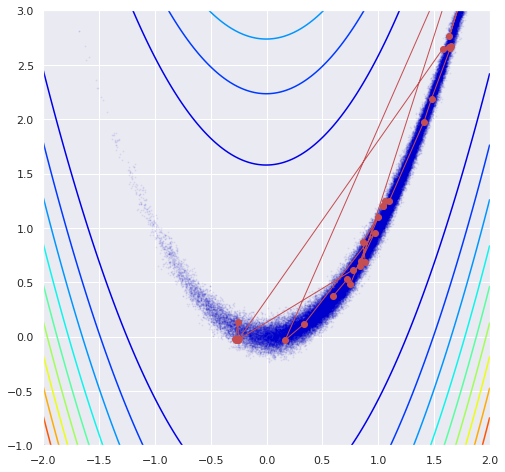

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.contour(x, y, z, 10, cmap='jet')
ax.scatter(samples[:, 0], samples[:, 1], color='mediumblue', marker='.', s=4, alpha=0.05)
ax.set(xlim=(-2, 2), ylim=(-1, 3))
ax.plot(samples[-50:, 0], samples[-50:, 1], 'ro-', lw=1);